<a href="https://colab.research.google.com/github/Akhil-CS/K-MeanClusteringforImageCompression/blob/master/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sys
import random
from skimage import io

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
koala = io.imread("/content/gdrive/My Drive/Koala.jpg")
penguins = io.imread("/content/gdrive/My Drive/Penguins.jpg")

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


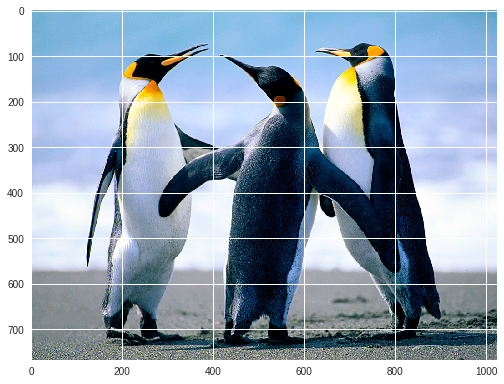

In [3]:
io.imshow(koala)
io.imshow(penguins)
io.show()

In [0]:
penguins = penguins/255

pixels = penguins.reshape(penguins.shape[0]*penguins.shape[1],3)

In [0]:
def closest_centroid(pixels, centroids,k):
  closest_centroid = []
  for i in pixels:  
    min_distance = 10000000
    for j in range(k):
      distance = np.square(i[0]-centroids[j][0])+ np.square(i[1]-centroids[j][1])+ np.square(i[2]-centroids[j][2]) 
      if distance < min_distance:
        min_distance = distance
        temp = j
    closest_centroid.append(temp)
  return closest_centroid
     

In [0]:
def new_centroids(closest_centroid,k,pixels):
  new_centroids = []
  for old in range(k):
    cntr = 0
    new = [0,0,0]
    for p in range(len(closest_centroid)):
      if closest_centroid[p] == old:
        new = new + pixels[p]
        cntr = cntr + 1
    new_centroids.append(np.divide(new,cntr))
    
  return new_centroids

In [0]:
def k_mean_clustering(points,k,iterations):
  final_centroids = []
  temp2 = []
  temp1 = 0
  clusters = random.sample(list(points),k)
  for i in range(iterations):
    a = closest_centroid(points,clusters,k)
    clusters = new_centroids(a,k,points)
  
  for i in range(len(points)):
    temp1 = a[i]
    temp2 = clusters[temp1]
    final_centroids.append(temp2)
  return final_centroids    

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


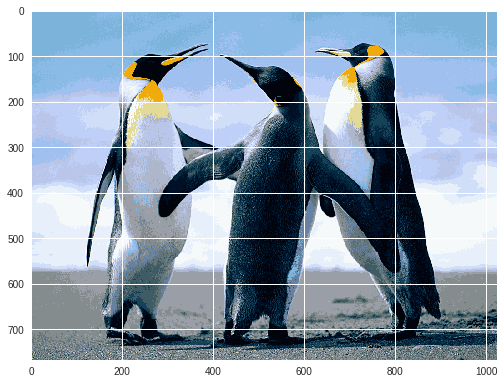

In [9]:
def main():
    k = 20
    iterations = 50
    final_colors = []
    final_colors = k_mean_clustering(pixels,k,iterations)
    recovered_image = np.asarray(final_colors).reshape(penguins.shape[0],penguins.shape[1],3)
    io.imshow(recovered_image)
   
      
if __name__ == "__main__":
    main()